In [4]:
import pandas as pd
import os
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [5]:
def load_prompt_log(filepath):
    """
    Load the prompt log CSV.
    """
    return pd.read_csv(filepath)

def concat_model_results(df_log):

    """
    Load each model result CSV and merge with the prompt log data to include the prompt strategy.
    """
    
    all_data = []
    for _, row in df_log.iterrows():
        
        series_num = row['series_num']
        prompt_strategy = row['prompt_msg']

        file_path = f"data/train_matrix_{series_num}"
        
        try:
            model_data = pd.read_csv(file_path)
            model_data['prompt_strategy'] = prompt_strategy  # Add prompt strategy to the model data
            model_data['series_num'] = series_num  # Also add series_num to help in analysis later
            all_data.append(model_data)
        except FileNotFoundError:
            print(f"Warning: File {file_path} not found.")
            
    df_concat = pd.concat(all_data, ignore_index=True)
    
    df_concat.rename(columns={df_concat.columns[0]: "labels" }, inplace = True)
    
    # Concatenate all model data into a single DataFrame
    return df_concat


In [83]:
def concat_specific_series_files(directory, series_start):
    """
    Concatenate CSV files from a specified directory where file names start with a given series number.
    
    Parameters:
        directory (str): Directory containing the files.
        series_start (str): Series number pattern to match the beginning of the file names.
    
    Returns:
        DataFrame: Concatenated DataFrame of all matched files.
    """
    all_data = []
    # List all files in the directory
    for file_name in os.listdir(directory):
        if file_name.startswith(f"new_train_matrix_{series_start}"):
            file_path = os.path.join(directory, file_name)
            try:
                model_data = pd.read_csv(file_path)
                model_data['series_num'] = file_name.split('_')[-1]
                model_data['series_num'] = model_data.series_num.astype(int)
                all_data.append(model_data)
            except FileNotFoundError:
                print(f"Warning: File {file_path} not found.")
            except pd.errors.EmptyDataError:
                print(f"Warning: File {file_path} is empty and cannot be loaded.")

    if all_data:
        # Concatenate all data into a single DataFrame
        df_concat = pd.concat(all_data, ignore_index=True)
        df_concat.rename(columns={df_concat.columns[0]: "labels" }, inplace = True)
        return df_concat
    else:
        return pd.DataFrame()  # Return an empty DataFrame if no files match


In [84]:
log_path = 'data/prompt_log.csv'
df_log = load_prompt_log(log_path)
df_log

,series_num,prompt_msg,sample_size,random_state
0,1713762899,zero-shot,53,20
1,1713762924,one-shot,53,20
2,1713762950,few-shot,53,20
3,1713763325,zero-shot,53,20
4,1713763353,one-shot,53,20
5,1713763380,few-shot,53,20
6,1714066738,zero-shot,53,20
7,1714066771,one-shot,53,20
8,1714066805,few-shot,53,20
9,1714492280,zero-shot,48,20


In [85]:
df_result = concat_specific_series_files('data','17144')

In [86]:
df_result

,labels,precision,recall,f1-score,support,series_num
0,academics,0.566667,1.000000,0.723404,17.0,1714492280
1,campus,0.687500,0.846154,0.758621,13.0,1714492280
2,student_life,0.615385,0.842105,0.711111,19.0,1714492280
3,professors,0.800000,0.666667,0.727273,12.0,1714492280
4,administration,0.428571,0.230769,0.300000,13.0,1714492280
5,micro avg,0.617978,0.743243,0.674847,74.0,1714492280
6,macro avg,0.619625,0.717139,0.644082,74.0,1714492280
7,weighted avg,0.613981,0.743243,0.652680,74.0,1714492280
8,samples avg,0.645833,0.838194,0.691071,74.0,1714492280
9,academics,0.586207,1.000000,0.739130,17.0,1714492306


In [92]:
df_result_meta = df_result.merge(df_log, how = "left", on = 'series_num')
# df_result_meta

,labels,precision,recall,f1-score,support,series_num,prompt_msg,sample_size,random_state
0,academics,0.566667,1.000000,0.723404,17.0,1714492280,zero-shot,48,20
1,campus,0.687500,0.846154,0.758621,13.0,1714492280,zero-shot,48,20
2,student_life,0.615385,0.842105,0.711111,19.0,1714492280,zero-shot,48,20
3,professors,0.800000,0.666667,0.727273,12.0,1714492280,zero-shot,48,20
4,administration,0.428571,0.230769,0.300000,13.0,1714492280,zero-shot,48,20
5,micro avg,0.617978,0.743243,0.674847,74.0,1714492280,zero-shot,48,20
6,macro avg,0.619625,0.717139,0.644082,74.0,1714492280,zero-shot,48,20
7,weighted avg,0.613981,0.743243,0.652680,74.0,1714492280,zero-shot,48,20
8,samples avg,0.645833,0.838194,0.691071,74.0,1714492280,zero-shot,48,20
9,academics,0.586207,1.000000,0.739130,17.0,1714492306,one-shot,48,20


In [91]:
df_zero = df_result_meta.query("prompt_msg == 'zero-shot'")
df_zero

,labels,precision,recall,f1-score,support,series_num,prompt_msg,sample_size,random_state
0,academics,0.566667,1.000000,0.723404,17.0,1714492280,zero-shot,48,20
1,campus,0.687500,0.846154,0.758621,13.0,1714492280,zero-shot,48,20
2,student_life,0.615385,0.842105,0.711111,19.0,1714492280,zero-shot,48,20
3,professors,0.800000,0.666667,0.727273,12.0,1714492280,zero-shot,48,20
4,administration,0.428571,0.230769,0.300000,13.0,1714492280,zero-shot,48,20
5,micro avg,0.617978,0.743243,0.674847,74.0,1714492280,zero-shot,48,20
6,macro avg,0.619625,0.717139,0.644082,74.0,1714492280,zero-shot,48,20
7,weighted avg,0.613981,0.743243,0.652680,74.0,1714492280,zero-shot,48,20
8,samples avg,0.645833,0.838194,0.691071,74.0,1714492280,zero-shot,48,20


           labels  precision    recall  f1-score  support  series_num prompt_msg  sample_size  random_state
0       academics   0.566667  1.000000  0.723404     17.0  1714492280  zero-shot           48            20
1          campus   0.687500  0.846154  0.758621     13.0  1714492280  zero-shot           48            20
2    student_life   0.615385  0.842105  0.711111     19.0  1714492280  zero-shot           48            20
3      professors   0.800000  0.666667  0.727273     12.0  1714492280  zero-shot           48            20
4  administration   0.428571  0.230769  0.300000     13.0  1714492280  zero-shot           48            20
5       micro avg   0.617978  0.743243  0.674847     74.0  1714492280  zero-shot           48            20
6       macro avg   0.619625  0.717139  0.644082     74.0  1714492280  zero-shot           48            20
7    weighted avg   0.613981  0.743243  0.652680     74.0  1714492280  zero-shot           48            20
8     samples avg   0.645833

In [27]:
df_aggregated = df_result[df_result['labels'].isin(['micro avg', 'macro avg', 'weighted avg', 'samples avg'])]
df_topics = df_result[~df_result['labels'].isin(['micro avg', 'macro avg', 'weighted avg', 'samples avg'])]

In [28]:
# Filter to include only rows where 'labels' is 'micro avg'
df_micro_avg = df_result[df_result['labels'] == 'micro avg']


In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
def plot_aggregated_matrix(df_result, matrix):
    
    df_plt = df_result[df_result['labels'] == matrix]
    
    num_support = df_plt['support'].mean()
    num_support = int(num_support)
    
    # Set the style
    sns.set(style="whitegrid", rc={"axes.grid": True, "grid.linestyle": ":"})

    # Create a figure and a set of subplots
    plt.figure(figsize=(10, 6))

    # Plot Precision
    sns.lineplot(data=df_plt, x='prompt_strategy', y='precision', marker='o', label='Precision', ci = None)

    # Plot Recall
    sns.lineplot(data=df_plt, x='prompt_strategy', y='recall', marker='o', label='Recall', ci = None)

    # Plot F1-Score
    sns.lineplot(data=df_plt, x='prompt_strategy', y='f1-score', marker='o', label='F1-Score', ci = None)

    # Adding title and labels
    plt.title(f'Comparison of {matrix} precision, recall, and f1-score by prompt strategy', fontsize = 14)
    plt.xlabel('Prompt Strategy', fontsize = 12, labelpad = 12)
    plt.ylabel('Score', fontsize = 12, labelpad = 12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)


    # Grid settings: Disable x-axis grid and enable y-axis grid for major ticks only
    plt.gca().xaxis.grid(False)  # Turn off x-axis grid
    plt.gca().yaxis.grid(True, which='major')  # Turn on y-axis major grid only


    # Add spines (axes lines) and remove top and right lines
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)


    plt.figtext(0.89, 0.03, f'Support = {num_support}', ha='left', va='bottom', fontsize=10)


    # Adding legend
    plt.legend(title='Metrics')

    plt.tight_layout()

    # Save Plot
    filename = f'{matrix}.png'
    
    if os.path.exists(filename):
        print(f"File '{filename}' already exists. Skipping save.")
    else:
        # Save the plot if the file does not exist
        plt.savefig(filename, bbox_inches='tight', dpi=300)
        print(f"File '{filename}' saved successfully.")

    # Show plot

    plt.show()




    

In [31]:
# agg_matrix = ['micro avg', 'macro avg', 'weighted avg', 'samples avg']
label = df_result.labels.unique()

for matrix in label:
    plot_aggregated_matrix(df_result, matrix)
    print(f'Result has been saved!')


ValueError: Could not interpret value `prompt_strategy` for parameter `x`

<Figure size 720x432 with 0 Axes>

<AxesSubplot:title={'center':'Distribution of labels'}, xlabel='labels'>

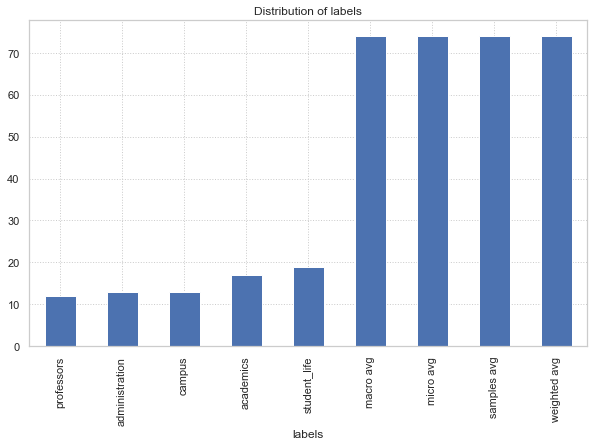

In [32]:
df_result.groupby('labels')['support'].mean().sort_values(ascending=True).plot(kind='bar', figsize=(10, 6), title='Distribution of labels')

In [33]:
agg_matrix = ['micro avg', 'macro avg', 'weighted avg', 'samples avg']
# label = df_result.labels.unique()

for matrix in agg_matrix:
    plot_aggregated_matrix(df_result, matrix)
    print(f'Result has been saved!')

ValueError: Could not interpret value `prompt_strategy` for parameter `x`

<Figure size 720x432 with 0 Axes>

In [22]:
df_result.groupby('labels')['support'].mean().sort_values(ascending=True)

labels
alumni_network       0.0
unclear              0.0
mission              1.0
irrelevant           2.0
party_scene          2.0
safety               2.0
value                3.0
athletics            3.0
affordability        3.0
campus_food          4.0
dorms                4.0
administration       4.0
career_prep          5.0
community            5.0
location             6.0
campus               6.0
campus_resource      8.0
diversity            9.0
student_life        11.0
professors          17.0
academics           18.0
micro avg          113.0
macro avg          113.0
samples avg        113.0
weighted avg       113.0
Name: support, dtype: float64

In [23]:
agg_matrix = ['micro avg', 'macro avg', 'weighted avg', 'samples avg']
# label = df_result.labels.unique()

for matrix in agg_matrix:
    plot_aggregated_matrix(concatenated_df, matrix)
    print(f'Result has been saved!')

NameError: name 'concatenated_df' is not defined